** breast cancer prediction **

In [43]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from scipy import stats



In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [45]:
breast_cancer_df = pd.read_csv('breast_cancer_dataset.csv')
breast_cancer_df.head(2)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead


In [46]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [47]:
breast_cancer_df.shape

(334, 16)

In [48]:
# setiing Patient_ID column as index , coz Patient_ID is a unique column
breast_cancer_df.set_index('Patient_ID', inplace=True)

In [49]:
breast_cancer_df['Date_of_Surgery'] = pd.to_datetime(breast_cancer_df['Date_of_Surgery'], format='%d-%b-%y')
breast_cancer_df['Date_of_Surgery'] = breast_cancer_df['Date_of_Surgery'].dt.strftime('%d/%m/%Y')
breast_cancer_df['Date_of_Surgery'] = pd.to_datetime(breast_cancer_df['Date_of_Surgery'], format='%d/%m/%Y')

In [50]:
breast_cancer_df['Date_of_Last_Visit'] = pd.to_datetime(breast_cancer_df['Date_of_Last_Visit'], format='%d-%b-%y')
breast_cancer_df['Date_of_Last_Visit'] = breast_cancer_df['Date_of_Last_Visit'].dt.strftime('%d/%m/%Y')
breast_cancer_df['Date_of_Last_Visit'] = pd.to_datetime(breast_cancer_df['Date_of_Last_Visit'], format='%d/%m/%Y')

In [51]:
breast_cancer_df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
Patient_ID,,,,,,,,,,,,,,,
TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead


In [52]:
col_name = breast_cancer_df.columns
col_name

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [53]:
for column in breast_cancer_df.select_dtypes(include=['object']).columns:
    print(column, ':', breast_cancer_df[column].unique())
    

Gender : ['FEMALE' 'MALE']
Tumour_Stage : ['III' 'II' 'I']
Histology : ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status : ['Positive']
PR status : ['Positive']
HER2 status : ['Negative' 'Positive']
Surgery_type : ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status : ['Alive' 'Dead' nan]


In [54]:
breast_cancer_df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [55]:
breast_cancer_df['Patient_Status'] = breast_cancer_df['Patient_Status'].fillna('Unknown')

In [56]:
breast_cancer_df.dropna(inplace=True)

In [57]:
breast_cancer_df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [58]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, TCGA-D8-A1XD to TCGA-B6-A40B
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    int64         
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null   

In [59]:
breast_cancer_df.duplicated().sum()

np.int64(0)

In [60]:
fig1 = px.histogram(breast_cancer_df, x='Age', nbins=20, title='Age Distribution', labels={'Age': 'Age (years)'})
fig1.update_layout(bargap=0.1)
fig1.show()

In [61]:
tumour_stage = breast_cancer_df['Tumour_Stage'].value_counts().reset_index()
tumour_stage.columns = ['Tumour', 'Count']

fig2 = px.pie(tumour_stage, values='Count', names='Tumour', title='Tumour stage of patients')
fig2.show()

In [62]:
gender_count = breast_cancer_df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Create the pie chart with Gender labels
fig3 = px.pie(gender_count, values='Count', names='Gender', title='Patient Gender Counts', hover_name='Gender')
fig3.show()


In [63]:
histology_gender_counts = breast_cancer_df.groupby(['Gender', 'Histology']).size().reset_index(name='Count')

fig4 = px.bar(histology_gender_counts, x='Histology', y='Count', color='Gender', title='Distribution of Histology Types by Gender',barmode='group',labels={'Histology': 'Histology Type', 'Count': 'Number of Patients'})
fig4.show()


In [64]:
surgery_gender_stage_counts = breast_cancer_df.groupby(['Gender', 'Tumour_Stage', 'Surgery_type']).size().reset_index(name='Count')

fig5 = px.bar(surgery_gender_stage_counts, x='Tumour_Stage', y='Count', color='Surgery_type', facet_row='Gender', title='Types of Surgery Performed for Tumor Stages by Gender', labels={'Tumour_Stage': 'Tumor Stage', 'Count': 'Number of Surgeries', 'Surgery_type': 'Surgery Type'}, barmode='group')
fig5.show()


In [65]:
breast_cancer_df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [66]:
for column in breast_cancer_df.select_dtypes(include=['object']).columns:
    print(column, ':', breast_cancer_df[column].unique())

Gender : ['FEMALE' 'MALE']
Tumour_Stage : ['III' 'II' 'I']
Histology : ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status : ['Positive']
PR status : ['Positive']
HER2 status : ['Negative' 'Positive']
Surgery_type : ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status : ['Alive' 'Dead']


In [67]:
breast_cancer_df['Gender'] = breast_cancer_df['Gender'].map({'FEMALE':0, 'MALE':1})
breast_cancer_df['Tumour_Stage'] = breast_cancer_df['Tumour_Stage'].map({'I':1, 'II':2, 'III':3})
breast_cancer_df['Histology'] = breast_cancer_df['Histology'].map({'Infiltrating Ductal Carcinoma':0, 'Mucinous Carcinoma':1, 'Infiltrating Lobular Carcinoma':2})
breast_cancer_df['ER status'] = breast_cancer_df['ER status'].map({'Positive':1})
breast_cancer_df['PR status'] = breast_cancer_df['PR status'].map({'Positive':1})
breast_cancer_df['HER2 status'] = breast_cancer_df['HER2 status'].map({'Negative':0,'Positive':1})
breast_cancer_df['Surgery_type'] = breast_cancer_df['Surgery_type'].map({'Modified Radical Mastectomy':0, 'Lumpectomy':1, 'Simple Mastectomy':2, 'Other':3})

In [68]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    fig = px.box(x=breast_cancer_df[column], title=f"bar plot of {column}")
    fig.show()


In [69]:
# sns.pairplot(breast_cancer_df, height=2)

In [70]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    Q1 = breast_cancer_df[column].quantile(0.25)  
    Q3 = breast_cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = breast_cancer_df[(breast_cancer_df[column] < lower_bound) | (breast_cancer_df[column] > upper_bound)]

    if not outliers.empty:
        print(f"Column with outliers: {column}")

    # print(f"Outliers in {column} ---------------------------------------------------:\n", outliers)

Column with outliers: Gender
Column with outliers: Protein1
Column with outliers: Protein3
Column with outliers: Protein4
Column with outliers: Tumour_Stage
Column with outliers: HER2 status


In [71]:
# ***** Columns with Outliers ****:
# Protein1
# Protein3
# Protein4

# outliers is yet to handle 

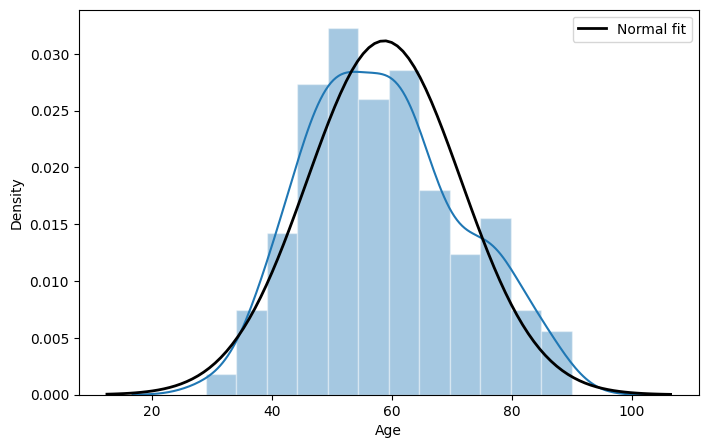

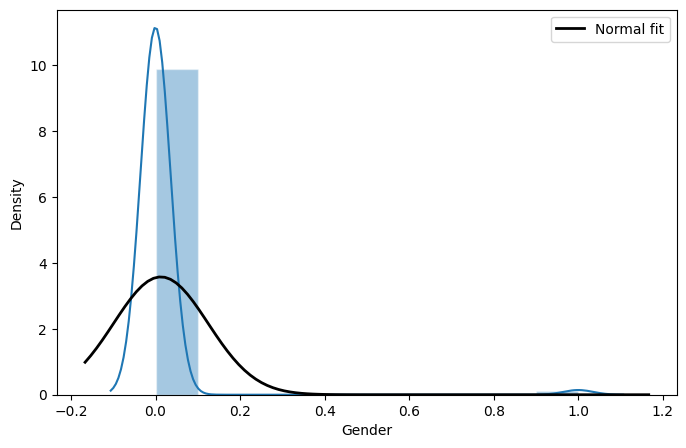

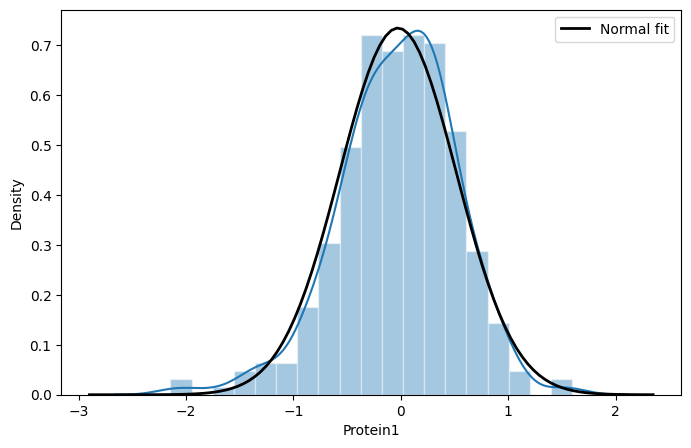

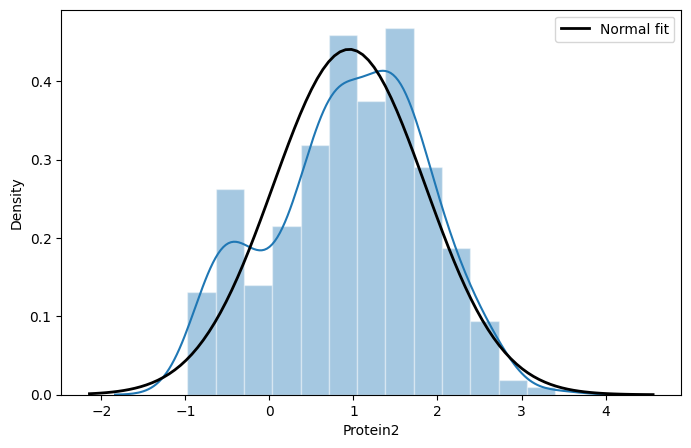

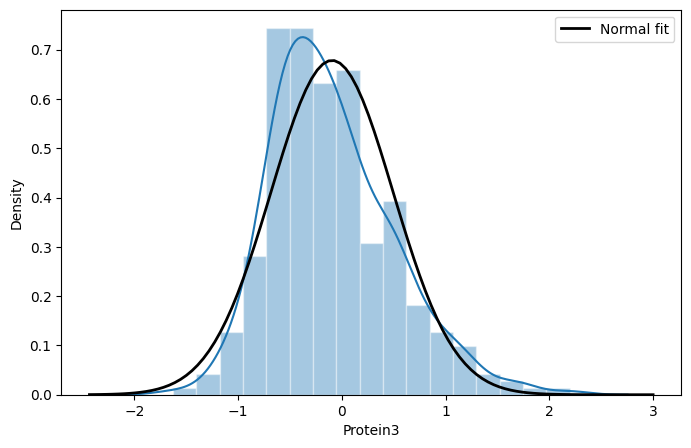

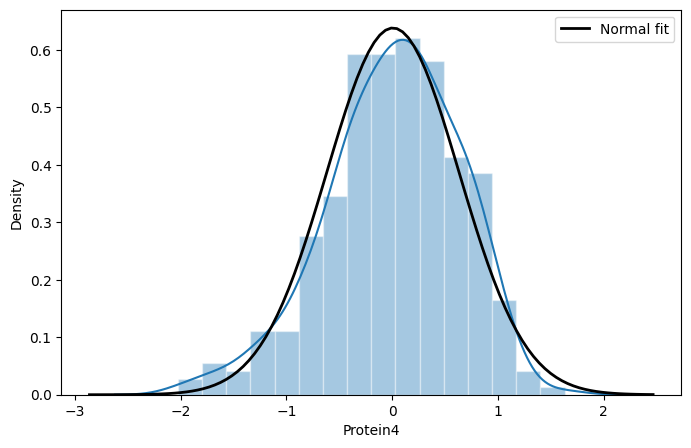

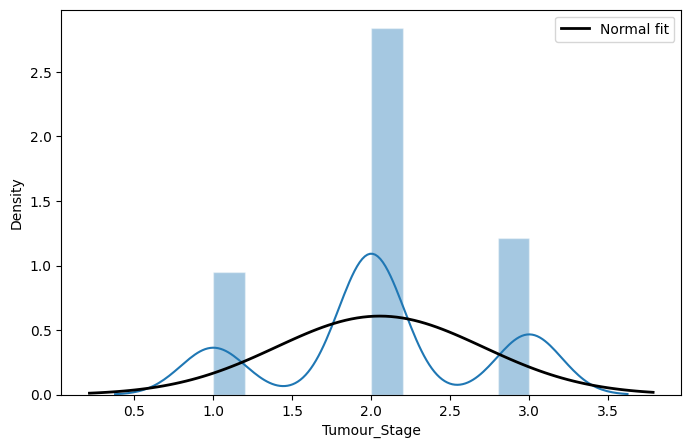

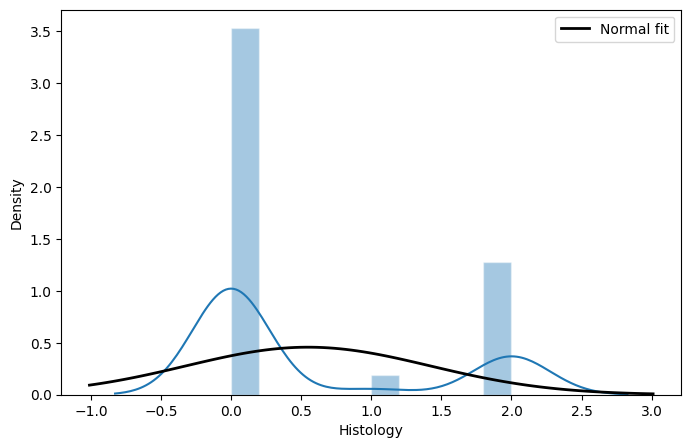

c:\python_VSC\DS_Practice_File\ds_practice\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2027: RuntimeWarning:

divide by zero encountered in divide



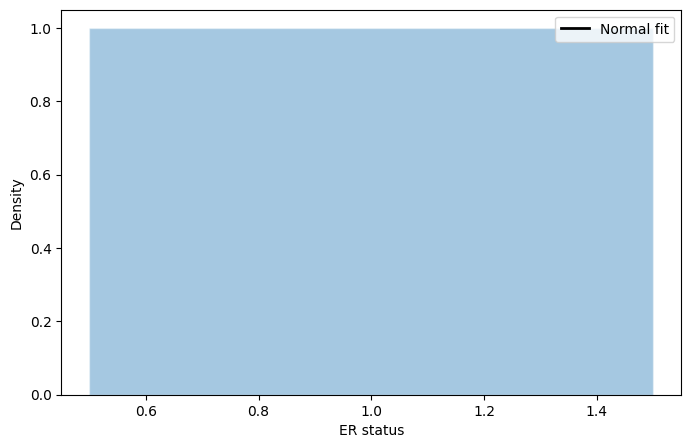

c:\python_VSC\DS_Practice_File\ds_practice\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2027: RuntimeWarning:

divide by zero encountered in divide



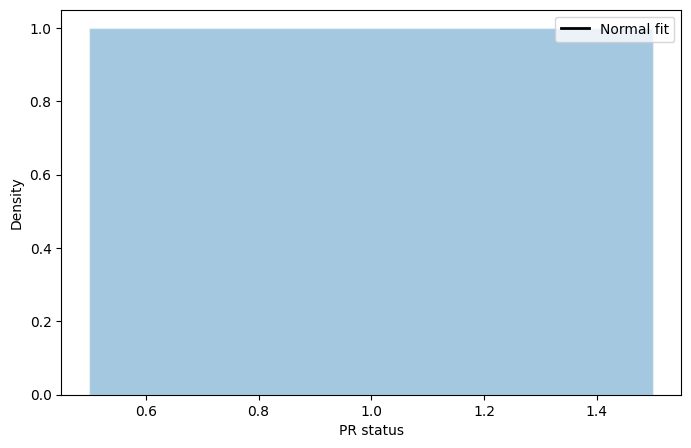

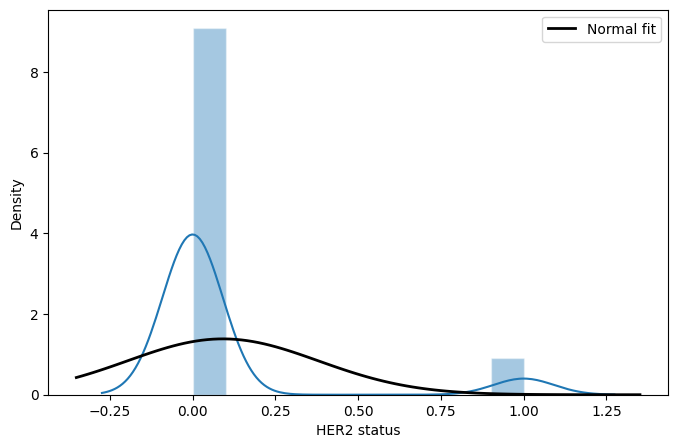

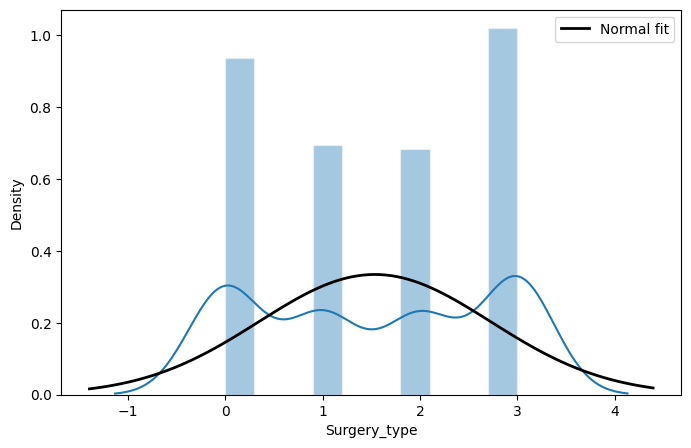

In [72]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8,5))
    sns.histplot(breast_cancer_df[column], kde=True, stat='density', kde_kws=dict(cut=3), alpha=0.4 , edgecolor = (1,1,1,.4))

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(breast_cancer_df[column]), np.std(breast_cancer_df[column]))
    plt.plot(x,p,'k', linewidth=2, label='Normal fit')

    plt.legend()
    plt.show()

In [73]:
#Steps to identify skewness.
# case 1: output inbetween (-0.5 to 0.5) Less skewness. Can be neglected.
# case 2: output inbetween (-1 to -0.5 or 0.5 to 1) moderately skewness. Can be considered for transmission.
# case 3: output inbetween (less than -1 or greater than 1) highly skewness. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

#Steps to identify kurtosis.
# case 1: output inbetween (-3 to 3) Less kurtosis. Can be neglected.
# case 2: output inbetween (-6 to -3 or 3 to 6) moderately kurtosis. Can be considered for transmission.
# case 3: output inbetween (less than -6 or greater than 6) highly kurtosis. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

In [74]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
  if breast_cancer_df[column].skew() < 0.5 and breast_cancer_df[column].skew() > -0.5 and breast_cancer_df[column].kurtosis() < 3 and breast_cancer_df[column].kurtosis() > -3:
    continue
  print(column)

Gender
Protein3
Histology
HER2 status


In [75]:
encoder = LabelEncoder()

breast_cancer_df['Patient_Status'] = encoder.fit_transform(breast_cancer_df['Patient_Status'])

In [76]:
breast_cancer_df.corr()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
Age,1.000000,0.026696,-0.044541,-0.011387,-0.047362,0.095417,-0.144483,-0.112056,NaN,NaN,-0.068386,0.055283,-0.027551,-0.041302,-0.012410
Gender,0.026696,1.000000,0.159685,0.000406,-0.017109,-0.014185,0.033881,0.058548,NaN,NaN,-0.035872,-0.027137,0.022958,0.070295,0.015509
Protein1,-0.044541,0.159685,1.000000,0.223093,-0.103046,0.259171,-0.051447,0.034852,NaN,NaN,-0.033544,-0.113679,-0.001130,-0.021326,-0.019805
Protein2,-0.011387,0.000406,0.223093,1.000000,-0.407670,0.084939,-0.049881,0.054666,NaN,NaN,-0.013568,0.069805,0.040933,0.013156,0.074810
Protein3,-0.047362,-0.017109,-0.103046,-0.407670,1.000000,0.076759,0.019770,-0.067691,NaN,NaN,-0.017628,-0.100419,0.052363,0.035105,0.025305
Protein4,0.095417,-0.014185,0.259171,0.084939,0.076759,1.000000,-0.050364,-0.011345,NaN,NaN,0.004728,-0.074504,-0.031130,-0.129724,0.074876
Tumour_Stage,-0.144483,0.033881,-0.051447,-0.049881,0.019770,-0.050364,1.000000,0.042390,NaN,NaN,0.141031,-0.133699,0.073243,-0.093438,0.056747
Histology,-0.112056,0.058548,0.034852,0.054666,-0.067691,-0.011345,0.042390,1.000000,NaN,NaN,-0.011532,0.029421,0.016518,0.005545,-0.027681
ER status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PR status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# perform hypothesis testing and found which columns are needed

In [78]:
# cont vs cont -- 2 sample t-test
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    print(f"2-sample t-test between {column} and Patient_Status")
    for i in range(31):
        sample1 = breast_cancer_df[column].sample(frac=0.03)
        sample2 = breast_cancer_df['Patient_Status'].sample(frac=0.04)

        t_test,p_value = stats.ttest_ind(sample1, sample2)

        # print(t_test,p_value)
        if p_value < 0.05:
            print("Reject the null hypothesis, Accept the alternative hypothesis, Data is independent")
        else:
            print("Accept the null hypothesis,Reject the alternative hypothesis, Data is dependent")
    
    print("---------------------------------------------------------------------------------")

2-sample t-test between Age and Patient_Status
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the alternative hypothesis, Data is independent
Reject the null hypothesis, Accept the a

c:\python_VSC\DS_Practice_File\ds_practice\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [79]:
# based on the 2-sample t-test we can keep 

# Age
# Protein1
# Protein2
# Tumour_Stage
# Surgery_type  these columns 

# and remove these columns

# Gender
# Protein3
# Protein4
# Histology
# HER2 status

In [80]:
# based on the correlation we conclude to drop 'ER status','PR status' these columns

# now based on the 2 sample t-test we conclude to drop 'HER2 status'

# based on domain knowledge we are keeping the columns 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status'

In [81]:
breast_cancer_df.drop(columns=['ER status','PR status', 'HER2 status'], inplace=True)

In [ ]:
# next step is to create ML model 